# 데이터 셋 다운로드 
- https://github.com/bab2min/corpus.git

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np


## 선생님의 코드 예시
- import pandas as pd
- import numpy as np
- import matplotlib.pyplot as plt
- from collections import Counter
- from wordcloud import WordCloud
- from konlpy.tag import Okt
- from tqdm import tqdm
- steam_reviews = pd.read_csv("./data/steam.txt", delimiter="\t",
                           header=None)
- steam_reviews.columns = ["label","review"]
- steam_reviews_pos = steam_reviews[steam_reviews['label'] == 1]
- steam_reviews_neg = steam_reviews[steam_reviews['label'] == 0]
- okt = Okt()
- steam_pos_tokens = [ t for doc in tqdm(steam_reviews_pos['review']) for t in okt.nouns(doc)]
- wc = WordCloud(background_color="white",
               font_path="C:\Windows\Fonts\malgunsl.ttf")
- cloud_rs = wc.generate_from_text(" ".join(steam_pos_tokens))
- plt.figure(figsize=(20,8))
- plt.imshow(cloud_rs)
- plt.axis("off") # x축,y축 끄기
- plt.show()

In [43]:
data=pd.read_csv('./data/naver_shopping.txt' ,delimiter='\t', header=None)
data

,0,1
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


# 데이터 선택 
- 네이버 쇼핑 리뷰 말뭉치
    - 라벨링: 5,4(긍정)/1,2(부정)-> 별도의 라벨링 작업 필요
- 스팀 리뷰 말뭉치
    - 라벨링:1(긍정)/0(부정)

# 데이터 로딩
- \t으로 데이터를 구분한 데이터 셋(tsv형식)
- 컬럼데이터가 없기 때문에 read_csv에서 header=None으로 읽기 

# 단어 빈도분석/ 단어 유사도 분석/ 감성분석

## 데이터의 결측치 등을 확인


In [6]:
data.info()
# 결측치가 없는 데이터이다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       200000 non-null  int64 
 1   1       200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [7]:
data.shape

(200000, 2)

## 토큰화 작업 


In [9]:
data.head()

,0,1
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [11]:
text_data=data[1]
text_data.head()

0                                              배공빠르고 굿
1                        택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2    아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3    선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4                    민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
Name: 1, dtype: object

In [13]:
# 띄어쓰기 단위로 모든 문장을 다 넣어서 리스트를 만들어 보자 
token_list=[t for doc in text_data for t in doc.split(" ")]
token_list

# 이중포문을 사용하여 간단하게 하였다. 그러나 사실 이중포문보다 정석적인 방법을 추천한다
#이중포문과 포문 간결식 공부해두자

['배공빠르고',
 '굿',
 '택배가',
 '엉망이네용',
 '저희집',
 '밑에층에',
 '말도없이',
 '놔두고가고',
 '아주좋아요',
 '바지',
 '정말',
 '좋아서2개',
 '더',
 '구매했어요',
 '이가격에',
 '대박입니다.',
 '바느질이',
 '조금',
 '엉성하긴',
 '하지만',
 '편하고',
 '가성비',
 '최고예요.',
 '선물용으로',
 '빨리',
 '받아서',
 '전달했어야',
 '하는',
 '상품이었는데',
 '머그컵만',
 '와서',
 '당황했습니다.',
 '전화했더니',
 '바로주신다했지만',
 '배송도',
 '누락되어있었네요..',
 '확인안하고',
 '바로',
 '선물했으면',
 '큰일날뻔했네요..이렇게',
 '배송이',
 '오래걸렸으면',
 '사는거',
 '다시',
 '생각했을거같아요',
 '아쉽네요..',
 '민트색상',
 '예뻐요.',
 '옆',
 '손잡이는',
 '거는',
 '용도로도',
 '사용되네요',
 'ㅎㅎ',
 '비추합니다',
 '계란',
 '뒤집을',
 '때',
 '완전',
 '불편해요',
 'ㅠㅠ',
 '코팅도',
 '묻어나고',
 '보기엔',
 '예쁘고',
 '실용적으로',
 '보였는데',
 '생각보다',
 '진짜',
 '별로입니다.',
 '주문을',
 '11월6에',
 '시켰는데',
 '11월16일에',
 '배송이',
 '왔네요',
 'ㅎㅎㅎ',
 '여기',
 '회사측과는',
 '전화도',
 '안되고',
 '아무런',
 '연락을',
 '받을수가',
 '없으니',
 '답답하신',
 '분들은',
 '다른곳에서',
 '사시는거',
 '추천드립니다',
 '넉넉한',
 '길이로',
 '주문했는데도',
 '안',
 '맞네요',
 '별로예요',
 '보폴이',
 '계속',
 '때처럼',
 '나오다가',
 '지금은',
 '안나네요~',
 '110인데',
 '전문속옷브랜드',
 '위생팬티105보다',
 '작은듯해요.',
 '불편해요.',
 '밴딩부분이',
 '다',
 '신축성없는',
 '일반실로',
 '되어있

## 단어 빈도 측정을 해보자 
### counter 활용 단어빈도 측정

In [14]:
from collections import Counter

In [15]:
counter=Counter(token_list)

In [16]:
counter.most_common(40)

[('너무', 22004),
 ('잘', 17893),
 ('재구매', 13791),
 ('좋아요', 11082),
 ('그냥', 9681),
 ('좀', 8214),
 ('다', 7085),
 ('많이', 6585),
 ('더', 6520),
 ('생각보다', 6119),
 ('배송도', 5278),
 ('배송', 4731),
 ('정말', 4581),
 ('빠르고', 3818),
 ('배송이', 3661),
 ('아주', 3636),
 ('ㅠㅠ', 3627),
 ('진짜', 3589),
 ('또', 3355),
 ('샀는데', 3352),
 ('넘', 3269),
 ('같아요', 3237),
 ('좋네요', 3096),
 ('조금', 3080),
 ('딱', 2945),
 ('것', 2914),
 ('아직', 2828),
 ('완전', 2801),
 ('엄청', 2711),
 ('ㅎㅎ', 2691),
 ('좋고', 2630),
 ('다시', 2465),
 ('다른', 2452),
 ('안', 2291),
 ('가격대비', 2285),
 ('제품', 2256),
 ('ㅠ', 2253),
 ('있어서', 2093),
 ('맘에', 2087),
 ('제가', 2069)]

### 빈도수 측정한것을 워드 클라우드로 만들어 보기 

- 원래는 인스톨을 해야한다. 
-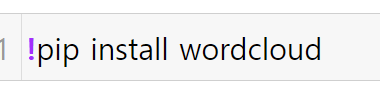

In [17]:
from wordcloud import WordCloud # 클래스

In [18]:
wc=WordCloud(background_color='white',font_path='C:\Windows\Fonts\malgun.ttf', random_state=802)

In [19]:
reviews=" ".join(token_list) # 하나의 문자열로 변경

In [20]:
cloud=wc.generate_from_text(reviews)

### 워드 클라우드를 시각화하여 뿌려주기


In [21]:
import matplotlib.pyplot as plt

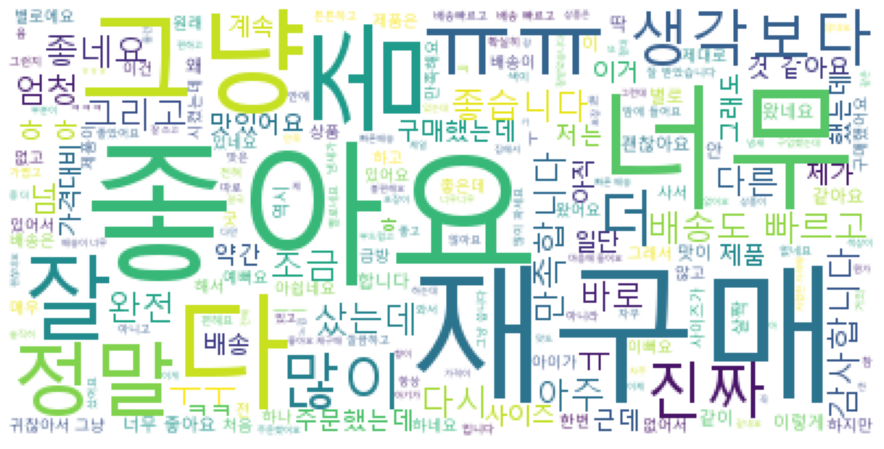

In [22]:
plt.figure(figsize=(20,8))
plt.imshow(cloud)
plt.axis('off') # x축, y축 끄기
plt.savefig('./naver_shopping_wordcloud.jpg') #그림 저장
plt.show()

## 단어 유사도 분석
- 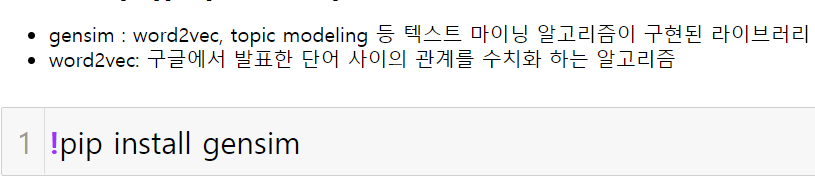

In [23]:
# gensim 임포트
from gensim.models import Word2Vec

In [24]:
# window :중심 단어 주변에 몇개까지 연관이 있다고 학습할지 결정하는 매개변수 
# min_count: 텍스트 내의 오타나 특정인물을 지칭하는것들은 갯수가 낮을 것임(등장빈도 낮음)-> 이러한 데이터는 제외
#sg 중심 단어의 개수 

w2c= Word2Vec(window=5,
              min_count=5,
              sg=1,
             vector_size=100,
             sentences=[doc.split(" ")for doc in text_data]) # 학습할 데이터 넣기

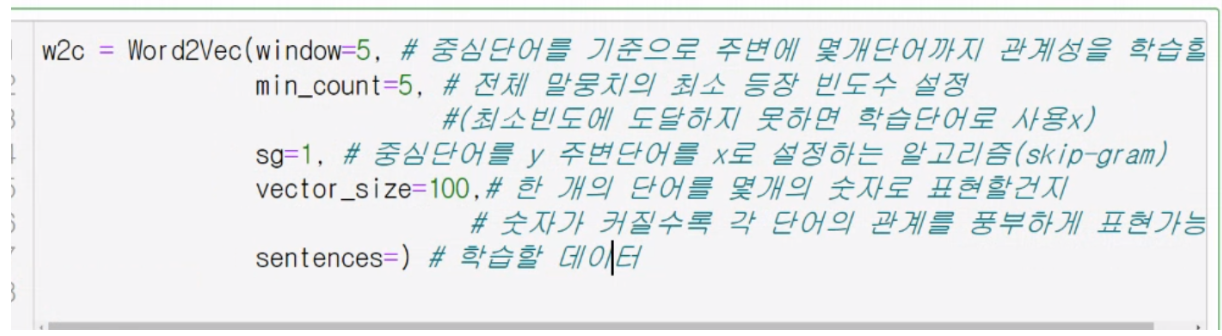

In [25]:
w2c.wv.get_vector('구매') #구매를 표현하는 숫자 100개

array([ 0.21726477,  0.33082935, -0.26271397,  0.31054318,  0.75407606,
       -0.7305934 ,  0.22767174,  0.2640618 ,  0.02030626,  0.17665721,
       -0.16957879, -0.5629661 ,  0.10348729, -0.83029836, -0.01191433,
       -0.250967  ,  0.09982796,  0.35965595,  0.29461864, -0.7957647 ,
        0.13419177,  0.5616574 ,  0.42787236, -0.52706814,  0.39357814,
       -0.15824823,  0.13691641,  0.1101437 , -0.11346292,  0.19981748,
        0.07914712,  0.10466199, -0.06273741,  0.08144783, -0.7971623 ,
        0.21312286, -0.6085513 , -0.48281845,  0.4778459 , -1.0855342 ,
       -0.14131303, -0.9409265 ,  0.1844523 ,  0.57784885, -0.1172289 ,
        0.29337758, -0.0828903 , -0.7108097 , -0.2183188 , -0.5709257 ,
        0.3588849 , -0.45306975, -0.1920688 , -0.66425824, -0.83389956,
        0.4241599 ,  0.42950055, -0.20084308,  0.43080115,  0.68940055,
        0.23059466, -0.0675561 , -0.07667344,  0.33045477, -0.08478941,
        0.33369595,  0.3591896 ,  0.45022333, -0.6387949 , -0.27

In [26]:
w2c.wv.most_similar('구매')

[('구입', 0.8773105144500732),
 ('주문', 0.8006466031074524),
 ('구매를', 0.7374415993690491),
 ('재주문', 0.6550549268722534),
 ('구입을', 0.6509892344474792),
 ('재', 0.6197900176048279),
 ('추천', 0.6178371906280518),
 ('구매는', 0.6172987222671509),
 ('고민', 0.6160847544670105),
 ('생각을', 0.6051355600357056)]

## 감성분석 

- 감성분석을 위해서 머신러닝을 통해 수치화를 진행한다
- 여기서는 앞서 배운대로 BOW를 이용하려고한다. 

In [27]:
# 라이브러리 임포트 
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# 객체생성
cv_test=CountVectorizer()

In [29]:
## 잘 되는 지 확인해보자
temp=['안녕 나는 뽀로로야.',
     '오늘 점심은 뽀로로야.',
     '안녕 나는 오늘 점심에 뽀로로를 먹을꺼야.',
     '너는 오늘 나와 집에 같이 가자. ']

In [30]:
cv_test.fit(temp)

CountVectorizer()

In [31]:
display(len(cv_test.vocabulary_))# 등록된 단어의 갯수 확인
display(cv_test.vocabulary_)

13

{'안녕': 8,
 '나는': 2,
 '뽀로로야': 7,
 '오늘': 9,
 '점심은': 11,
 '점심에': 10,
 '뽀로로를': 6,
 '먹을꺼야': 5,
 '너는': 4,
 '나와': 3,
 '집에': 12,
 '같이': 1,
 '가자': 0}

In [32]:
## 이제 본격적으로 넣어보자 
cv_test.fit(text_data)
# 주의 단어사전을 만들어야함으로 우리가 미리 만들어논 text_data를 사용하도록 한다. 


CountVectorizer()

In [34]:
# 단어 빈도수 측정을 수치화함
cv_test.transform(text_data)

<200000x362867 sparse matrix of type '<class 'numpy.int64'>'
	with 1598464 stored elements in Compressed Sparse Row format>

### 학습 데이터 구성 

In [37]:
data.head()
# 데이터의 상태 파악


,0,1
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


### 데이터를 훈련용 데이터와 테스트 데이터로 나누어야한다. 

In [38]:
from sklearn.model_selection import train_test_split

In [48]:
data[0][(data[0]==1) | (data[0]==2)]=0 # 부정리뷰를 0으로 통일 


C:\Users\AI\AppData\Local\Temp\ipykernel_29088\1587471050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[0][(data[0]==1) | (data[0]==2)]=0 # 부정리뷰를 0으로 통일


In [49]:
data.head()

,0,1
0,5,배공빠르고 굿
1,0,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,0,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [50]:
data[0][(data[0]==5) | (data[0]==4)]=1 # 긍정리뷰를 1로 바꾼다

C:\Users\AI\AppData\Local\Temp\ipykernel_29088\4102821496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[0][(data[0]==5) | (data[0]==4)]=1 # 긍정리뷰를 1로 바꾼다


In [51]:
data.head()

,0,1
0,1,배공빠르고 굿
1,0,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,1,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,0,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,1,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [53]:
X_train, X_test, y_train,y_test=train_test_split(data[1],data[0],test_size=0.3,random_state=801)

In [54]:
X_train.shape, X_test.shape

((140000,), (60000,))

In [56]:
X_train.head()

110340    앞뒤로 구겨짐이 엉망이네요. 조리과정에서 폴이 안들어갈만큼 구겨진걸 겨우 펴서 조립...
196484                              배송도 빠르고 좋은공 싸게사고 선포장까지~
119267              재구매 너무 길지 않아 좋습니다.이불도 많이 들어가네요. 재구매합니다.
159790                              재구매 밥냄새가 예전같진 않은데 만족합니다
82272     재구매 배송도빠르고 항상 잘먹고 있어요 너~무좋아요 실망한적이 없어요 지인들에게도 ...
Name: 1, dtype: object

In [55]:
y_train.shape,y_test.shape

((140000,), (60000,))

In [57]:
y_train.head()

110340    0
196484    1
119267    1
159790    1
82272     1
Name: 0, dtype: int64

In [61]:
text_data.head()

0                                              배공빠르고 굿
1                                                    0
2    아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3                                                    0
4                    민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
Name: 1, dtype: object

In [62]:
naver_shopping_cv=CountVectorizer()
naver_shopping_cv.fit(data[1]) # 단어사전 구축



CountVectorizer()

# 모델링

In [68]:
#라이브러리 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train= naver_shopping_cv.transform(X_train) # 빈도기반의 수치화
X_test= naver_shopping_cv.transform(X_test)# 리뷰데이터 기본 컬럼값이 document

In [65]:
logi_model= LogisticRegression()

In [69]:
rs=cross_val_score(logi_model,X_train,y_train, cv=3)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [70]:
rs

array([0.87438661, 0.87397947, 0.87729825])

In [71]:
# 학습 및 예측 
logi_model.fit(X_train,y_train)
sample_reivews=['학익진도 그렇고, 뭐... 학익진 펼치는게 개쩌는데추천합니다',
                 '의와 불의의 싸움은 언제나 의 입니다선과의는 어제나 오늘이나 영원합니다이땅이 여기까지 오기까지는 의인의 희생이 있었음을알고 애국의삶을 살아갑시다',
                '박해일만이 표현할 수 있는 눈빛연기 그의 표정은 모든 감정이 담겨있다.',
                '그냥 말이 필요없움…체고…거북선 등장하는 씬에서는 눈물광광']

sample_transform=naver_shopping_cv.transform(sample_reivews)#정형화 작업
pre=logi_model.predict_proba(sample_transform) #확률값 예측

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
pre

array([[0.78456782, 0.21543218],
       [0.24866441, 0.75133559],
       [0.40810326, 0.59189674],
       [0.71015753, 0.28984247]])

## 학습된 단어별 토큰 가중치 확인 

In [73]:
naver_coef=logi_model.coef_[0]
len(naver_coef)

362867

In [75]:
naver_vocab=naver_shopping_cv.vocabulary_
len(naver_vocab)

362867

In [76]:
naver_vocab

{'배공빠르고': 144285,
 '택배가': 328253,
 '엉망이네용': 236510,
 '저희집': 281929,
 '밑에층에': 135641,
 '말도없이': 112901,
 '놔두고가고': 74168,
 '아주좋아요': 216524,
 '바지': 137872,
 '정말': 285979,
 '좋아서2개': 294839,
 '구매했어요': 42223,
 '이가격에': 256947,
 '대박입니다': 86272,
 '바느질이': 136348,
 '조금': 290456,
 '엉성하긴': 236600,
 '하지만': 346223,
 '편하고': 337222,
 '가성비': 20624,
 '최고예요': 316198,
 '선물용으로': 186039,
 '빨리': 168936,
 '받아서': 140909,
 '전달했어야': 283022,
 '하는': 344679,
 '상품이었는데': 180520,
 '머그컵만': 118326,
 '와서': 247036,
 '당황했습니다': 85699,
 '전화했더니': 284315,
 '바로주신다했지만': 137302,
 '배송도': 145136,
 '누락되어있었네요': 74473,
 '확인안하고': 357143,
 '바로': 137071,
 '선물했으면': 186370,
 '큰일날뻔했네요': 325909,
 '이렇게': 258757,
 '배송이': 146749,
 '오래걸렸으면': 243233,
 '사는거': 171745,
 '다시': 80389,
 '생각했을거같아요': 183841,
 '아쉽네요': 214925,
 '민트색상': 134677,
 '예뻐요': 241942,
 '손잡이는': 193034,
 '거는': 27533,
 '용도로도': 250269,
 '사용되네요': 173523,
 'ㅎㅎ': 16077,
 '비추합니다': 166540,
 '계란': 32762,
 '뒤집을': 96099,
 '완전': 247570,
 '불편해요': 162420,
 'ㅠㅠ': 17196,
 '코팅도': 323545,
 '묻어나고': 1302

In [77]:
print(naver_coef[0])
naver_vocab

#각각의 가중치를 확인 할수 있지만 단어와 매칭을 시켜주어야 한다. 

-0.07900375747171431


{'배공빠르고': 144285,
 '택배가': 328253,
 '엉망이네용': 236510,
 '저희집': 281929,
 '밑에층에': 135641,
 '말도없이': 112901,
 '놔두고가고': 74168,
 '아주좋아요': 216524,
 '바지': 137872,
 '정말': 285979,
 '좋아서2개': 294839,
 '구매했어요': 42223,
 '이가격에': 256947,
 '대박입니다': 86272,
 '바느질이': 136348,
 '조금': 290456,
 '엉성하긴': 236600,
 '하지만': 346223,
 '편하고': 337222,
 '가성비': 20624,
 '최고예요': 316198,
 '선물용으로': 186039,
 '빨리': 168936,
 '받아서': 140909,
 '전달했어야': 283022,
 '하는': 344679,
 '상품이었는데': 180520,
 '머그컵만': 118326,
 '와서': 247036,
 '당황했습니다': 85699,
 '전화했더니': 284315,
 '바로주신다했지만': 137302,
 '배송도': 145136,
 '누락되어있었네요': 74473,
 '확인안하고': 357143,
 '바로': 137071,
 '선물했으면': 186370,
 '큰일날뻔했네요': 325909,
 '이렇게': 258757,
 '배송이': 146749,
 '오래걸렸으면': 243233,
 '사는거': 171745,
 '다시': 80389,
 '생각했을거같아요': 183841,
 '아쉽네요': 214925,
 '민트색상': 134677,
 '예뻐요': 241942,
 '손잡이는': 193034,
 '거는': 27533,
 '용도로도': 250269,
 '사용되네요': 173523,
 'ㅎㅎ': 16077,
 '비추합니다': 166540,
 '계란': 32762,
 '뒤집을': 96099,
 '완전': 247570,
 '불편해요': 162420,
 'ㅠㅠ': 17196,
 '코팅도': 323545,
 '묻어나고': 1302

In [78]:
# vocab 정렬하기 
import pandas as pd
df= pd.DataFrame([naver_vocab.keys(),naver_vocab.values()],index=['단어','인덱스']).T.sort_values(by='인덱스').set_index('인덱스')

#vocab과 가중치 결합
df['가중치']=naver_coef
df

C:\Users\AI\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,단어,가중치
인덱스,,
0,00,-0.079004
1,000,0.145122
2,0001,0.258024
3,000dnjs,0.000000
4,000개,0.097108
...,...,...
362862,힝ㅠ기대했는데,0.000000
362863,힝힝,-0.063889
362864,힞들어요,-0.103092


In [79]:
#가중치를 중심으로 정렬 -> 상위 30 , 하위 30개 단어 추출
df.sort_values(by='가중치', inplace=True, ascending=False)
top30=df.head(30)
bottom30=df.tail(30)

In [80]:
top30

,단어,가중치
인덱스,,
115180,맛있네요,3.062581
115313,맛있습니다,2.988711
115359,맛있어요,2.922637
114176,맛나요,2.833026
295570,좋아하시네요,2.692061
241942,예뻐요,2.662734
316140,최고네요,2.599662
316184,최고에요,2.559107
316267,최고입니다,2.512198


In [81]:
bottom30

,단어,가중치
인덱스,,
260732,이상해요,-2.429888
162387,불편합니다,-2.437031
204264,실망이에요,-2.444428
176147,사지마세요,-2.447936
219999,안들어요,-2.454917
101845,떨어져요,-2.456322
101932,떨어지고,-2.464434
204375,실망했어요,-2.489745
46184,그냥그래요,-2.529628


## 시각화 

<AxesSubplot:xlabel='단어'>

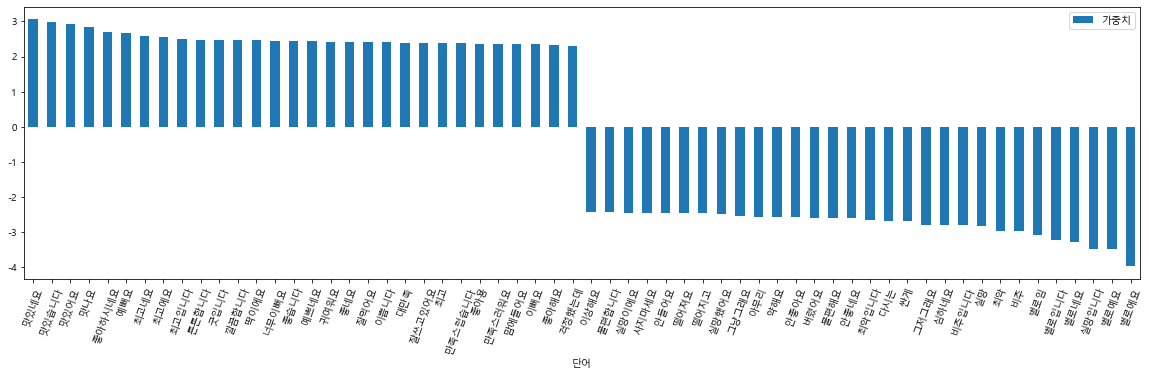

In [82]:
#  시각화 
#한글로 출력하기 위해서 폰트 지정하기 !
from matplotlib import rc
rc('font',family='Malgun Gothic')
#마이너스 나오게 하기
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

main_words= pd.concat([top30,bottom30])
main_words.set_index('단어').plot(kind='bar',figsize=(20,5), rot=70)

## 하이퍼 파라미터 튜닝

In [83]:
# tf-idf 임포트 하기
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
## 파이프라인 생성
# 파이프라인: 머신러닝 작업을 하나의 프로세스로 묶어주는것
# ex) 결측치-> 스케일러 -> 인코더-> 모델링
from sklearn.pipeline import Pipeline

In [85]:
pipeline=Pipeline([
    ('shopping_tfidf', TfidfVectorizer()),
    ('shopping_logi' ,LogisticRegression())
])

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
grid_param={
    "shopping_tfidf__max_df":[7000,8500,10000],
    "shopping_tfidf__min_df":[1,5,8,10],
    "shopping_tfidf__ngram_range":[(1,2),(2,2),(1,3)],
    "shopping_logi__C":[0.001,0.01,0.1,10,100,1000]
}

### 그리드 서치로 하이퍼 파라미터 넣어줌 

In [91]:
grid=GridSearchCV(pipeline, grid_param,cv=3,n_jobs=-1)
grid.fit(data[1] ,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [200000, 140000]